In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

## Data Preparation

In [ ]:
plain_text_df = pd.read_json('/content/drive/MyDrive/SOCI40133/data/input/level_0_plain_text.json')
plain_text_df

,opinion_id,flags,plain_text,court_id,date_filed,keep_sw,keep_sw_no
0,458753,True,"[773_F.2d_1004, Ronnie G. ROBINS, Plaintiff-Ap...",ca9,1985-10-03,"[[773_f.2d_1004], [ronnie, g., robins, plainti...","[[773_f.2d_1004], [ronnie, g., robins, plainti..."
1,2621442,True,"[Colorado Court of Appeals, Div. V., *1035 Ken...",coloctapp,2003-01-21,"[[colorado, court, of, appeals, div, v], [1035...","[[colorado, court, appeals, div, v], [1035, ke..."
2,491523,True,"[823 F.2d 1014, 8 Fed. R. Serv. 3d 417, 23 Fed...",ca7,1987-06-10,"[[823, f.2d, 1014], [8, fed, r., serv, 3d, 417...","[[823, f.2d, 1014], [8, fed, r., serv, 3d, 417..."
3,4849283,True,"[Pontisakos & Brandman, PC, Garden City (Eliza...",nyappdiv,2021-01-19,"[[pontisakos, brandman, pc, garden, city, eliz...","[[pontisakos, brandman, pc, garden, city, eliz..."
4,1802247,True,"[United States District Court, N.D. Georgia, A...",gand,1993-07-22,"[[united, states, district, court, n.d, georgi...","[[united, states, district, court, n.d, georgi..."
...,...,...,...,...,...,...,...
19222,2424823,True,"[United States District Court, D. New Jersey.,...",njd,2000-12-21,"[[united, states, district, court, d., new, je...","[[united, states, district, court, d., new, je..."
19223,4613652,True,"[Larry Sheehan, Bronx, for appellant., Darcel ...",nyappdiv,2019-04-25,"[[larry, sheehan, bronx, for, appellant], [dar...","[[larry, sheehan, bronx, appellant], [darcel, ..."
19224,2424827,True,"[United States District Court, D. Connecticut....",ctd,2001-01-02,"[[united, states, district, court, d., connect...","[[united, states, district, court, d., connect..."
19225,3383506,True,[The Honorable Charlie Green Lee County Clerk ...,flaag,2002-01-30,"[[the, honorable, charlie, green, lee, county,...","[[honorable, charlie, green, lee, county, cler..."


In [ ]:
plain_text_df['decade'] = plain_text_df['date_filed'].progress_apply(lambda k: int(k.split('-')[0]) // 10 * 10)
filtered_df = plain_text_df[plain_text_df['decade'] <= 2010]
filtered_df = filtered_df[filtered_df['decade'] >= 1960]

100%|██████████| 18786/18786 [00:00<00:00, 564173.72it/s]


In [ ]:
paragraph_motion, op_id, date_filed, paragraph_no = [], [], [], []
motions_kw = ['motion', 'motions']
for idx, row in plain_text_df.iterrows():
    for para_id, word_list in enumerate(row['keep_sw']):
        if any(value in word_list for value in motions_kw):
            paragraph_motion.append(word_list)
            op_id.append(row['opinion_id'])
            date_filed.append(row['date_filed'])
            paragraph_no.append(para_id)

motion_df = pd.DataFrame({'opinion_id': op_id, 'date_filed': date_filed, 'paragraph_no': paragraph_no, 'motion': paragraph_motion})
motion_df

,opinion_id,date_filed,paragraph_no,motion
0,458753,1985-10-03,10,"[appellant, mike, harum, james, harum, joe, co..."
1,458753,1985-10-03,14,"[on, february, 6, 1984, the, robinse, who, be,..."
2,458753,1985-10-03,15,"[the, jury, return, a, verdict, in, favor, of,..."
3,458753,1985-10-03,18,"[we, review, a, district, court, 's, denial, o..."
4,458753,1985-10-03,28,"[in, deny, appellant, second, motion, for, sum..."
...,...,...,...,...
74546,2424823,2000-12-21,72,"[2, the, defendant, statement, of, uncontested..."
74547,4613652,2019-04-25,3,"[the, court, properly, deny, defendant, 's, su..."
74548,6067205,2013-06-27,0,"[order, supreme, court, new, york, county, jef..."
74549,6067205,2013-06-27,1,"[the, portion, of, the, subject, order, that, ..."


In [ ]:
paragraph_claim, op_id, date_filed, paragraph_no = [], [], [], []
claim_kw = ['claim', 'claims', 'claiming', 'claimed']
for idx, row in plain_text_df.iterrows():
    for para_id, word_list in enumerate(row['keep_sw']):
        if any(value in word_list for value in claim_kw):
            paragraph_claim.append(word_list)
            op_id.append(row['opinion_id'])
            date_filed.append(row['date_filed'])
            paragraph_no.append(para_id)

claim_df = pd.DataFrame({'opinion_id': op_id, 'date_filed': date_filed, 'paragraph_no': paragraph_no, 'claim': paragraph_claim})
claim_df

,opinion_id,date_filed,paragraph_no,claim
0,458753,1985-10-03,10,"[appellant, mike, harum, james, harum, joe, co..."
1,458753,1985-10-03,14,"[on, february, 6, 1984, the, robinse, who, be,..."
2,458753,1985-10-03,15,"[the, jury, return, a, verdict, in, favor, of,..."
3,458753,1985-10-03,20,"[section, 1983, claim]"
4,458753,1985-10-03,21,"[the, robinse, claim, for, excessive, use, of,..."
...,...,...,...,...
142043,2424827,2001-01-02,143,"[lewis, have, also, satisfy, the, second, and,..."
142044,2424827,2001-01-02,149,"[with, regard, to, rule, i-5, voccola, and, th..."
142045,2424827,2001-01-02,150,"[with, regard, to, rule, j-8, voccola, and, th..."
142046,2424827,2001-01-02,195,"[8, although, voccola, also, claim, that, he, ..."


## Preprocess the Corpus for Motions to do Discourse Atom

In [ ]:
import gensim
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

motion_corpus = motion_df['motion']
bigram_model = Phrases(motion_corpus, min_count=500, threshold=10, connector_words=ENGLISH_CONNECTOR_WORDS)
phrased_corpus = bigram_model[motion_corpus]
phrased_corpus = list(phrased_corpus)

In [ ]:
!pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=ef517fdac165446e9bb0f3aa505e731ac00c49dbe502f882affa0ca16c2070fc
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [ ]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')

phrased_corpus = [[word for word in sentence if word not in stop_words] for sentence in phrased_corpus]

In [ ]:
CBOW_W2V = gensim.models.word2vec.Word2Vec(phrased_corpus, vector_size=200, window=10, min_count=5, sg=0, workers=8)
skipgram_W2V = gensim.models.word2vec.Word2Vec(phrased_corpus, vector_size=200, window=10, min_count=5, sg=1, workers=8)

In [ ]:
!pip install ksvd

In [ ]:
import re
import string
import cython
import pickle
import math
from gensim import corpora, models, similarities #calc all similarities at once, from http://radimrehurek.com/gensim/tut3.html
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

from sklearn.metrics.pairwise import cosine_similarity

from random import seed, sample
from ksvd import ApproximateKSVD #pip or conda install ksvd #this is key!

In [ ]:
#### TRAIN MODEL:

#n_comp: Number of topics (i.e., atoms, or dictionary elements)
#n_nonzeros: Number of nonzero coefficients to target (how many atoms each word can load onto)

save_dir = '/content/drive/MyDrive/SOCI40133/data/output/'
##create the saving folder if you need!!

def do_aksvd(w2vmodel, n_comp, n_nonzeros, save=False, savelocation=save_dir):
    #https://github.com/nel215/ksvd #takes about 2 min on Alina's laptop for 30 atoms
    aksvd_t = ApproximateKSVD(n_components=n_comp, transform_n_nonzero_coefs=n_nonzeros) #also may adjuste n iter which is default at 10, and tolerance for error which is default at  tol=1e-6 #n_components is number of discourse atoms, since vocab size is smallish, keep this fewer. transform_n is the number of atoms (components) that a word can be a linear combo of
    dictionary_t = aksvd_t.fit(w2vmodel.wv.vectors).components_ # Dictionary is the matrix of discourse atoms.
    alpha_t = aksvd_t.transform(w2vmodel.wv.vectors) #get the alphas, which are the "weights" of each word on a discourse atoms

    if save==True:
        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_aksvd_nvdrsdf20','wb')
        pickle.dump(aksvd_t,outfile)
        outfile.close()

        outfile = open(str(savelocation) + '200d_' +str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_dictionary_nvdrsdf20','wb')
        pickle.dump(dictionary_t,outfile)
        outfile.close()

        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_alpha_nvdrsdf20','wb')
        pickle.dump(alpha_t,outfile)
        outfile.close()
    return(dictionary_t, alpha_t)

In [ ]:
def reconst_qual(w2vmodel, dictionary_mat, alpha_mat):
    #reconstruct the word vectors
    reconstructed = alpha_mat.dot(dictionary_mat) #reconstruct word vectors and add back in mean(?). but note that reconstructed norm is still around 0-1, not 1, is that an issue?
    #e1 = norm(w2vmodel.wv.vectors - reconstructed) #total reconstruction error, larger means MORE error. norm as specified here takes frobenius norm of error matrix.

    #total VARIANCE in the data: sum of squares
    squares3= w2vmodel.wv.vectors-np.mean(w2vmodel.wv.vectors, axis=1).reshape(-1,1) #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sst3= np.sum([i.dot(i) for i in squares3] ) #same as below

    sst3= np.sum(np.square(squares3))

    #total sum of squared ERRORS/residuals
    e3= [reconstructed[i]-w2vmodel.wv.vectors[i] for i in range(0,len(w2vmodel.wv.vectors))]  #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sse3= np.sum([i.dot(i) for i in e3] ) #same as below
    sse3= np.sum(np.square(e3))

    #R^2: 1- (SSE / SST )
    r2= 1- (sse3 /  sst3) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error

    #compute root mean square error
    rmse=  math.sqrt(np.mean(np.square(e3)))

    return(sse3, rmse, r2) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error

In [ ]:
#topic diversity (% unique words among total closest 25 words to each atom)
def topic_diversity(w2vmodel, dictionary_mat, top_n=30):

    topwords=[] #list of list, each innter list includes top N words in that topic

    for i in range(0, len(dictionary_mat)): #set to number of total topics
        topwords.extend([i[0] for i in w2vmodel.wv.similar_by_vector(dictionary_mat[i],topn=top_n)]) #set for top N words
        #print(w2vmodel.wv.similar_by_vector(dictionary[i],topn=N))

    uniquewords= set(topwords)
    diversity = len(uniquewords)/len(topwords)
    return(diversity)

In [ ]:
dictionary, alpha = do_aksvd(skipgram_W2V, 150, 5, save=True)
print(topic_diversity(skipgram_W2V, dictionary, top_n=30))
print(reconst_qual(skipgram_W2V, dictionary, alpha))

0.9
(87547.68, 0.1346935065428126, 0.5776503086090088)


In [ ]:
dictionary_100, alpha_100 = do_aksvd(skipgram_W2V, 100, 5, save=True)
print(topic_diversity(skipgram_W2V, dictionary_100, top_n=30))
print(reconst_qual(skipgram_W2V, dictionary_100, alpha_100))

0.9343333333333333
(91920.85, 0.13801660996099321, 0.5565531551837921)


In [ ]:
dictionary_50, alpha_50 = do_aksvd(skipgram_W2V, 50, 5, save=True)
print(topic_diversity(skipgram_W2V, dictionary_50, top_n=30))
print(reconst_qual(skipgram_W2V, dictionary_50, alpha_50))

0.9766666666666667
(98963.33, 0.14320608877891236, 0.5225786566734314)


In [ ]:
for i in range(0, len(dictionary_50)):
    print("Discourse_Atom " + str(i))
    print([i[0] for i in skipgram_W2V.wv.similar_by_vector(dictionary[i],topn=25)]) #what are the most similar words to the Nth
    #print([i[0] for i in w2vmodel.wv.similar_by_vector(-dictionary[i],topn=25)]) #what are the most similar words to the Nth dicourse atom?
    print('\n')

Discourse_Atom 0
['fed.rule', '6231', 'repl', 'f.r', 'r.crim.p', '1.36', '7.2', 'b', '1915a', 'fed.r.civ', 'nycrr', '170.3', '9.141', '72.3', 'gcr', '2056', 'ill.rev.stat.1989', 'n.m.s.a', 'subds', 'o.s.2011', 'bankr.p', '28.01', '78u-4', 'supp.1999', 'f.r.c.p']


Discourse_Atom 1
['477_u.s._at_323', 'p.56', 'material_fact', 'issue_of_material', 'genuine_issue', 'no_genuine', '106_s.ct._at_2553', 'genuine', '477_u.s._at_250', '477_u.s._at_256', 'hartnagel', 'genuinely', '106_s.ct._at_2510', '477_u.s._at_247', 'dispute', '477_u.s._at_324', 'exist', '477_u.s._at_325', '106_s.ct._at_2552', 'pivotal', 'hemsworth', 'nonexistence', 'fed.r.civ.p_56', "o'ferrell", 'moldowan']


Discourse_Atom 2
['cornelison', 'bobbie', 'covelli', 'lunge', 'unholstere', 'volley', 'burdick', 'swing', 'gear', 'revill', 'holster', 'subaru', 'gaddi', 'fidel', 'distract', 'vestibule', 'launcher', 'brandish', 'rossiter', 'mangum', 'swinge', 'poke', 'kicking', 'rivet', 'suddenly']


Discourse_Atom 3
['veniremember', '

In [ ]:
dictionary_cbow, alpha_cbow = do_aksvd(CBOW_W2V, 50, 5, save=True)
print(topic_diversity(CBOW_W2V, dictionary_cbow, top_n=30))
print(reconst_qual(CBOW_W2V, dictionary_cbow, alpha_cbow))

0.9433333333333334
(339050.0, 0.2650673426001581, 0.5458287000656128)


In [ ]:
for i in range(0, len(dictionary_cbow)):
    print("Discourse_Atom " + str(i))
    print([i[0] for i in CBOW_W2V.wv.similar_by_vector(dictionary[i],topn=25)]) #what are the most similar words to the Nth
    #print([i[0] for i in w2vmodel.wv.similar_by_vector(-dictionary[i],topn=25)]) #what are the most similar words to the Nth dicourse atom?
    print('\n')

Discourse_Atom 0
['n.d', 'h', 'tex.r.civ.p', '437c', 'feed', 'e.d.mo', 'n.y.civ.prac.l', '166a', 'civ.p', '7.1', 'm.g.l', 'fed.r', '38', 'tit', 'tex.r', 'ill.rev.stat', '56_e', "gov't", 'l.r', '4007', 'arts', '56_c', 'miss.code', 'c.f.r', 'comp']


Discourse_Atom 1
['cobell', 'cir.1950', 'hhf', 'adicke', 'kress', 's.h', 'genuinely', 'demonstrating', '398_u.s._144', 'alcon', 'enters', 'interrogatory_and_admission', '477_u.s._at_323', '90_s.ct._1598', "entm't", '337_u.s._541', '93_l.ed._1528', '69_s.ct._1221', '110_s.ct._3177', 'adickes', 'fidelity', '®', 'pulliam', 'woodard', 'no_genuine']


Discourse_Atom 2
['self_defense', 'mrs', 'mistaken', 'aggressor', 'shoot', 'twice', 'avent', 'still', 'moment', 'whether', 'coon', 'finally', 'nimely', 'akopian', 'shooting', 'flee', 'durant', 'alvaro', 'remain', 'shot', 'believe', 'headrick', 'turn', 'gun', 'jury']


Discourse_Atom 3
['excuse', 'neutral', 'veniremember', 'mcclinton', 'venire', 'xxxx', 'roa', 'bendheim', 'waxse', 'osband', 'petit', 

## Discourse Atoms Into Sequence

In [ ]:
from __future__ import division
import pandas as pd
import cython
import pickle
from gensim.models import Word2Vec
from sklearn.preprocessing import normalize
from random import sample
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import math
from scipy.linalg import norm
from collections import Counter
from ksvd import ApproximateKSVD
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD
import re
import string, re
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from random import seed, sample
%matplotlib inline

In [ ]:
w2vmodel = skipgram_W2V

In [ ]:
def get_freq_dict(w2vmodel, weight_a=.001): #reasonable range for weight a is .001 to .0001 based on Arora et al SIF embeddings. The extent to which we re-weight words is controlled by the parameter $a$, where a lower value for $a$ means that frequent words are more aggressively down-weighted compared to less frequent words.
    freq_dictionary = {word: w2vmodel.wv.get_vecattr(word, 'count') for word in w2vmodel.wv.index_to_key}
    total= sum(freq_dictionary.values())
    freq_dictionary = {word: weight_a/(weight_a + (w2vmodel.wv.get_vecattr(word, 'count') / total)) for word in w2vmodel.wv.index_to_key} #best values according to arora et al are between .001 and .0001
    return(freq_dictionary)

freq_dict_skip = get_freq_dict(skipgram_W2V, weight_a=.001)
freq_dict_CBOW = get_freq_dict(CBOW_W2V, weight_a=.001)

In [ ]:
#function to yield a weighted sentence, using the above weight dictionary
def get_weighted_sent(tokedsent,freq_dict, w2vmodel = w2vmodel):
    weightedsent= [freq_dict[word]*w2vmodel.wv[word] for word in tokedsent if word in freq_dict.keys()]
    return(sum(weightedsent)/len(weightedsent))
    #weightedsent_avg  #divide the weighted average by the number of words in the sentence

def samp_cts(docs, n_sample, windowsize, freq_dictionary):
    sampnarrs=  sample(docs, n_sample) #sample of narratives. Will take 1 random window and discourse vector of this window, from each narrative.
    sampvecs= []


    # t1_start = time.time()

    for i in sampnarrs: #adjusting here to corpus sample, but consider using full corpus for final SIF embeddings.
        if len(i)>windowsize: #want window length to be at least windowsize words
            n= sample(range(0,len(i)-windowsize), 1)[0] #get some random positon in the narrative (at least windowsize steps behind the last one though)
            sent= i[n:n+windowsize] #random context window
            sampvecs.append(get_weighted_sent(i, freq_dictionary)) #sample a discourse vector, and append to a list of sample discourse vectors.
            n= sample(range(0,len(i)-windowsize), 1)[0] #get some random positon in the narrative (at least windowsize steps behind the last one though)
            sent= i[n:n+windowsize] #random context window
            sampvecs.append(get_weighted_sent(i, freq_dictionary)) #sample a discourse vector, and append to a list of sample discourse vectors.
    sampvecs= np.asarray(sampvecs)
    # t1_stop = perf_counter() #for 100k context windows takes
    # print(t1_stop-t1_start)
    return(sampvecs)

def get_c0(sampvecs):
    svd = TruncatedSVD(n_components=1, n_iter=10, random_state=0) #only keeping top component, using same method as in SIF embedding code
    svd.fit(sampvecs) #1st singular vector  is now c_o
    return(svd.components_[0])

def remove_c0(comdiscvec, modcontextvecs):
    curcontextvec= [X - X.dot(comdiscvec.transpose()) * comdiscvec for X in modcontextvecs] #remove c_0 from all the cts
    curcontextvec=np.asarray(modcontextvecs)
    return(curcontextvec)

In [ ]:
sampvecs2_cbow = samp_cts(list(motion_df['motion']), len(motion_df), 20, freq_dict_CBOW) #we used a random sample of 50,000 context vectors
sampvecs2_cbow = normalize(sampvecs2_cbow, axis=1) #l2 normalize the resulting context vectors

sampvecs2_skip = samp_cts(list(motion_df['motion']), len(motion_df), 20, freq_dict_skip) #we used a random sample of 50,000 context vectors
sampvecs2_skip = normalize(sampvecs2_skip, axis=1) #l2 normalize the resulting context vectors

In [ ]:
pc0_cbow= get_c0(sampvecs2_cbow)
pc0_skip= get_c0(sampvecs2_skip)

In [ ]:
sampvecs2_narcme = remove_c0(pc0_narcme, sampvecs2_narcme)


In [ ]:
def sif_atom_seqs(toked_narrative, window_size, topics_dictionary, c0_vector, freq_dict, w2vmodel):

    toked_narr2 = [i for i in toked_narrative if i in w2vmodel.wv.index_to_key] #remove words not in vocab
    if len(toked_narr2)> 19 :  #this is set so that only narratives with at least 19 tokens in the w2v model vocab are considered.
        it = iter(toked_narr2)
        win = [next(it) for cnt in range(0,window_size)] #first context window
        MAPs= normalize(remove_c0( c0_vector, get_weighted_sent(win, freq_dict, w2vmodel).reshape(1,200))) #doing the SIF map here. Hardcoding in the dimensionality of the space to speed this up.
        for e in it: # Subsequent windows
            win[:-1] = win[1:]
            win[-1] = e
            MAPs = np.vstack((MAPs, normalize(remove_c0(c0_vector, get_weighted_sent(win, freq_dict, w2vmodel).reshape(1,200)))))  #this will be matrix of MAPs

        costri= linear_kernel(MAPs, topics_dictionary)
        atomsseq= np.argmax(costri, axis=1) #this is for the index of the closest atom to each of the MAPs
        #maxinRow = np.amax(costri, axis=1) #this is for the closest atom's cossim value to each of the maps
        return(atomsseq.tolist()) #returns sequence of the closest atoms to the MAPs
    else:
        return(None)

In [ ]:
sif_atom_seqs(motion_df['motion'][10], 10, dictionary_50, pc0_narcme, freq_dict, w2vmodel) #get SIFS then, get atoms. Returns N closest atoms, to N rolling windows

[49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49]

In [ ]:
motion_df['motion_atom_seq_skip']= motion_df['motion'].progress_apply(lambda x: sif_atom_seqs(x, 15, dictionary_50, pc0_skip, freq_dict_skip, skipgram_W2V) )
motion_df['motion_atom_seq_skip']= motion_df['motion_atom_seq_skip'].progress_apply(lambda x: ' '.join([str(elem) for elem in x])  if(np.all(pd.notnull(x)))  else x )

  0%|          | 142/74551 [00:11<1:37:13, 12.76it/s]


KeyboardInterrupt: 

In [ ]:
motion_df

,opinion_id,date_filed,paragraph_no,motion,motion_atom_seq_skip
0,458753,1985-10-03,10,"[appellant, mike, harum, james, harum, joe, co...",49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 4...
1,458753,1985-10-03,14,"[on, february, 6, 1984, the, robinse, who, be,...",49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 4...
2,458753,1985-10-03,15,"[the, jury, return, a, verdict, in, favor, of,...",49 49 42 49 49 49 49 49 49 49 49 49 49 49 49 4...
3,458753,1985-10-03,18,"[we, review, a, district, court, 's, denial, o...",49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 4...
4,458753,1985-10-03,28,"[in, deny, appellant, second, motion, for, sum...",49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 4...
...,...,...,...,...,...
74546,2424823,2000-12-21,72,"[2, the, defendant, statement, of, uncontested...",49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 4...
74547,4613652,2019-04-25,3,"[the, court, properly, deny, defendant, 's, su...",49 49 49 49 49 49 49 49 49 49 49 49 49 49 49
74548,6067205,2013-06-27,0,"[order, supreme, court, new, york, county, jef...",49 49 49 49 49 49 49 49 49 49 49
74549,6067205,2013-06-27,1,"[the, portion, of, the, subject, order, that, ...",49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 4...


In [ ]:

motion_df['motion_atom_seq_cbow']= motion_df['motion'].progress_apply(lambda x: sif_atom_seqs(x, 15, dictionary_cbow, pc0_cbow, freq_dict_CBOW, CBOW_W2V) )
motion_df['motion_atom_seq_cbow']= motion_df['motion_atom_seq_cbow'].progress_apply(lambda x: ' '.join([str(elem) for elem in x])  if(np.all(pd.notnull(x)))  else x )

100%|██████████| 74551/74551 [00:02<00:00, 34106.51it/s]


In [ ]:
motion_df.to_csv('/content/drive/MyDrive/SOCI40133/data/output/ksvd/motion_df_sif.csv')

In [ ]:
motion_df['motion_atom_seq_cbow'] = motion_df['motion_atom_seq_cbow'].fillna('')
bow_transformer = TfidfVectorizer(analyzer = 'word', norm='l1', use_idf=False, token_pattern='\S+')
#need token pattern, otherwise splits using using 0-9 single digits too! #note that atoms that are part of all or no documents will not be transformed here, can reset this default, but I left as is for now since makes prediction easier (fewer features). #includes l1 normalization so that longer documents don't get more weight, l1 normalizes with abs value but all our values are pos anyways
bow_transformer.fit(motion_df['motion_atom_seq_cbow'].dropna(inplace=False)) #corpus needs to be in format ['word word word'], NOT tokenized already

TfidfVectorizer(norm='l1', token_pattern='\\S+', use_idf=False)

In [ ]:
vecked = bow_transformer.transform(motion_df['motion_atom_seq_cbow'].tolist()).toarray() #consider instead:  vecked = bow_transformer.transform(corpus['narcme_narle_atom_seq_combined'].dropna(inplace=True).tolist()).toarray() #this is the "feature" data, now in an array for sklearn models
corpus = pd.concat([motion_df,pd.DataFrame(vecked, columns = bow_transformer.get_feature_names_out())], axis=1, sort=False)
discourse_atom_col = [str(i) for i in range(50)]

In [ ]:
corpus['year'] = corpus['date_filed'].progress_apply(lambda x: int(x.split('-')[0]))
corpus['decade'] = corpus['year'].progress_apply(lambda x: int(x/10)*10)

100%|██████████| 74551/74551 [00:00<00:00, 741729.82it/s]


In [ ]:
corpus.columns

Index(['opinion_id', 'date_filed', 'paragraph_no', 'motion',
       'motion_atom_seq_skip', 'motion_atom_seq_cbow', '0', '1', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '5', '6', '7', '8', '9', 'year',
       'decade'],
      dtype='object')

In [ ]:
for name, group in corpus.groupby('opinion_id'):

  mean_discourse_atom = group[discourse_atom_col].mean(axis=0)


In [ ]:
# prompt: Can I loop through "for name, group in corpus.groupby('opinion_id')", and append results from "group[discourse_atom_col].mean(axis=0)" to a new df

new_df = pd.DataFrame()
for name, group in corpus.groupby('opinion_id'):
    new_df = new_df.append(group[discourse_atom_col].mean(axis=0), ignore_index=True)


Streaming output truncated to the last 5000 lines.
<ipython-input-136-889941018cb3>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_df = normalized_df.append(group[discourse_atom_col].mean(axis=0), ignore_index=True)
<ipython-input-136-889941018cb3>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_df = normalized_df.append(group[discourse_atom_col].mean(axis=0), ignore_index=True)
<ipython-input-136-889941018cb3>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_df = normalized_df.append(group[discourse_atom_col].mean(axis=0), ignore_index=True)
<ipython-input-136-889941018cb3>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [ ]:
normalized_df

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,year,decade,opinion_id
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,2010.0,2010.0,641
1,0.0,0.000000,0.000000,0.000000,0.002941,0.000000,0.035294,0.008824,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.035294,0.061905,0.000000,0.191974,2010.0,2010.0,645
2,0.0,0.000000,0.006116,0.000000,0.000000,0.000000,0.022222,0.009174,0.000000,0.000000,...,0.000000,0.000000,0.044444,0.376962,0.000000,0.045872,0.218145,2010.0,2010.0,698
3,0.0,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.215385,0.061538,0.000000,2009.0,2000.0,905
4,0.0,0.000000,0.000000,0.000000,0.001302,0.000000,0.021773,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.018128,0.069613,0.154019,0.246687,0.194886,2010.0,2010.0,1234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11960,0.0,0.004159,0.000000,0.018071,0.002577,0.000000,0.009060,0.013746,0.092413,0.050108,...,0.000825,0.000000,0.000000,0.000000,0.041360,0.134967,0.291917,2023.0,2020.0,9416534
11961,0.0,0.000000,0.000000,0.000000,0.000000,0.063713,0.047662,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.104374,0.000000,0.306769,2023.0,2020.0,9416676
11962,0.0,0.000000,0.000000,0.019444,0.000000,0.000000,0.000000,0.000000,0.000000,0.097917,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.081019,0.435417,2023.0,2020.0,9416868
11963,0.0,0.000000,0.000000,0.024873,0.000000,0.000000,0.109707,0.000000,0.000000,0.000000,...,0.001770,0.002667,0.000000,0.000000,0.197235,0.000000,0.161756,2023.0,2020.0,9417287


In [ ]:
year = []
year_df = pd.DataFrame()
for name, group in normalized_df.groupby('year'):
  year.append(name)

  mean_discourse_atom = group[discourse_atom_col].mean(axis=0)
  year_df = year_df.append(group[discourse_atom_col].mean(axis=0), ignore_index=True)

year_df['year'] = year


<ipython-input-143-fbdea1113ecb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  year_df = year_df.append(group[discourse_atom_col].mean(axis=0), ignore_index=True)
<ipython-input-143-fbdea1113ecb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  year_df = year_df.append(group[discourse_atom_col].mean(axis=0), ignore_index=True)
<ipython-input-143-fbdea1113ecb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  year_df = year_df.append(group[discourse_atom_col].mean(axis=0), ignore_index=True)
<ipython-input-143-fbdea1113ecb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  year_df = year_df.append(group[discourse_atom_col].mean(axis=0),

In [ ]:
year_subset = year_df[year_df['year']>=1950]

In [ ]:
# prompt: Using dataframe year_subset: For the first 50 columns, I want to throw away the columns with 25 smallest mean values



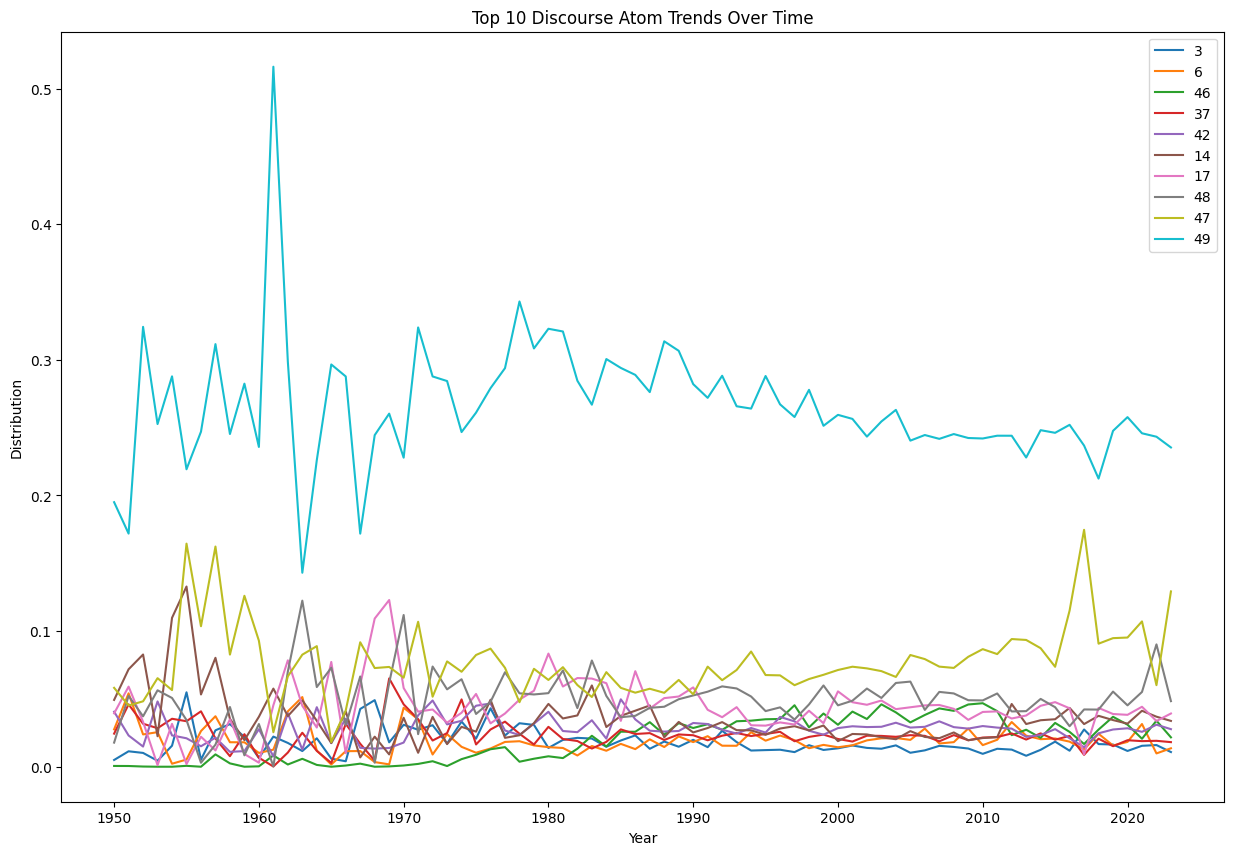

In [ ]:
# prompt: Now I want to make a top 20 line chart to see how the columns values change over the time of column 'year'

import matplotlib.pyplot as plt

top_10_cat = year_subset.iloc[:, :50].mean(axis=0).sort_values()[40:].index.tolist()

# Create a new DataFrame with the top 20 columns
top_10_df = year_subset[top_10_cat]

# Create a line chart
plt.figure(figsize=(15, 10))

for col in top_10_df.columns:
    plt.plot(year_subset['year'], top_10_df[col], label=col)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Distribution')
plt.title('Top 10 Discourse Atom Trends Over Time')

# Add legend and show plot
plt.legend()
plt.show()


In [ ]:
discourse_atom_of_interest = {
    '49': 'Legal Interpretation',
    '47': 'Police/Custody/Arrest',
    '46': 'Deadly Force',
    '12': 'Homicide/Violence',
    '15': 'Malicious Mens Rea',
    '39': 'Unlawful/Wrongful',
    '21': '14th Amendment',
    '32': 'Minority',
}

<ipython-input-170-f5990aa583b0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_df.rename(columns=discourse_atom_of_interest, inplace=True)


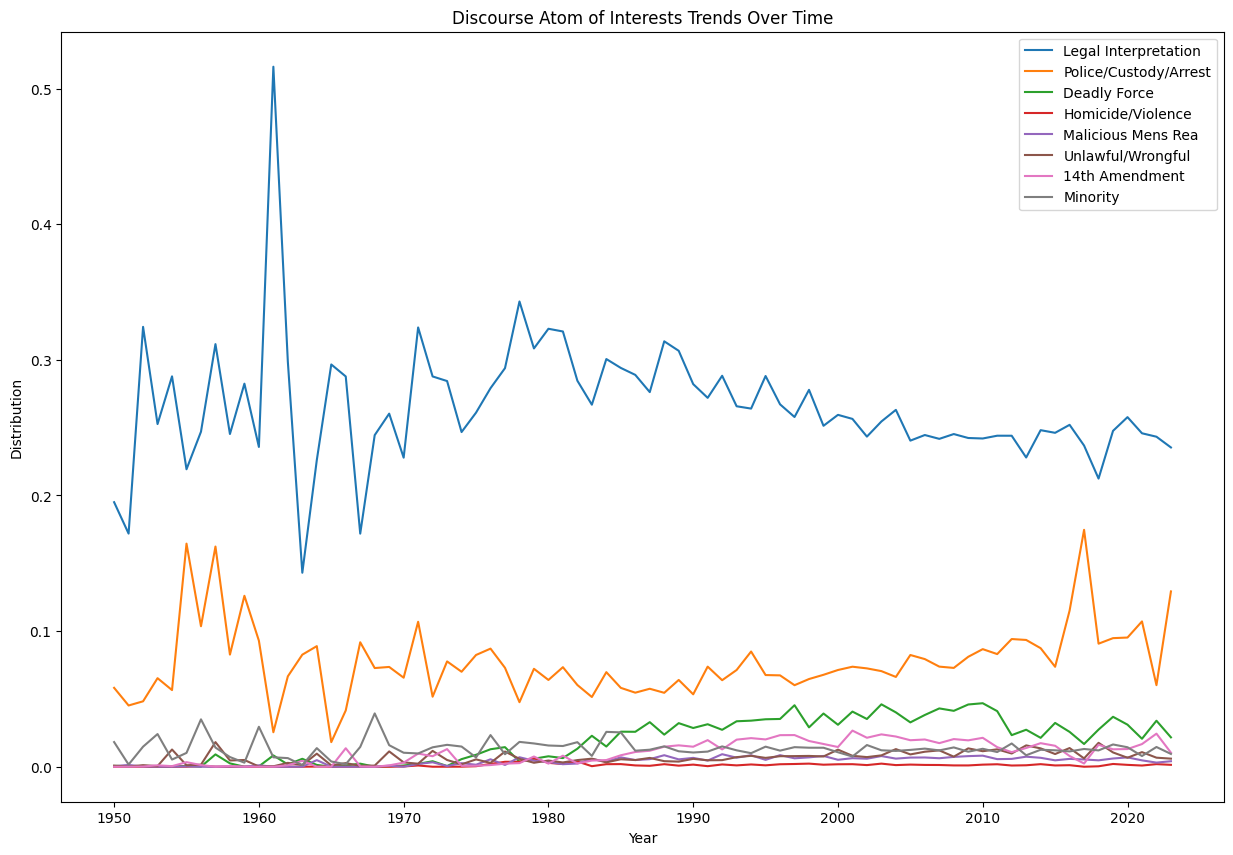

In [ ]:
# prompt: Now I want to make a top 20 line chart to see how the columns values change over the time of column 'year'

import matplotlib.pyplot as plt

# Create a new DataFrame with the top 20 columns
top_20_df = year_subset[list(discourse_atom_of_interest.keys())]
top_20_df.rename(columns=discourse_atom_of_interest, inplace=True)

# Create a line chart
plt.figure(figsize=(15, 10))

for col in top_20_df.columns:
    plt.plot(year_subset['year'], top_20_df[col], label=col)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Distribution')
plt.title('Discourse Atom of Interests Trends Over Time')

# Add legend and show plot
plt.legend()
plt.show()


<ipython-input-173-ded406a81683>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_df.rename(columns=discourse_atom_of_interest, inplace=True)


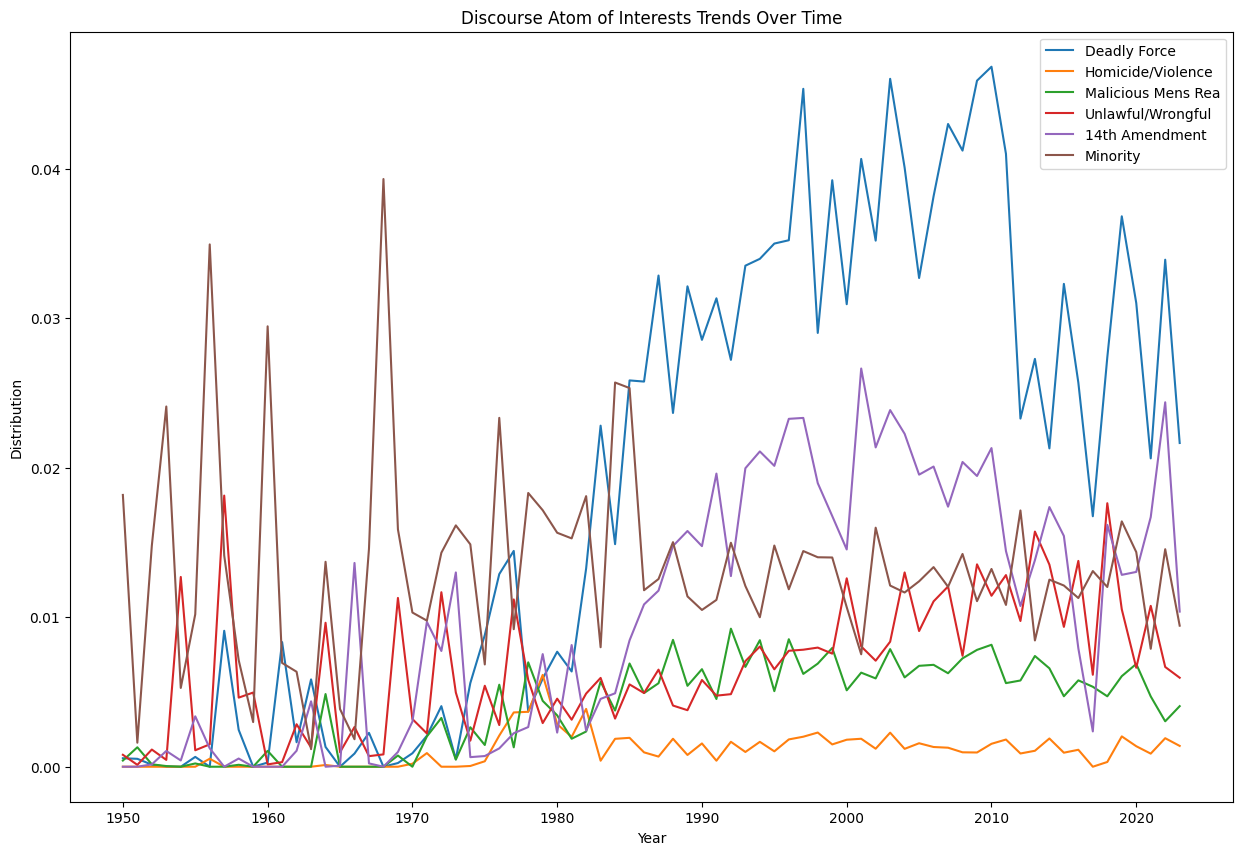

In [ ]:
discourse_atom_of_interest = {
    # '49': 'Legal Interpretation',
    # '47': 'Police/Custody/Arrest',
    '46': 'Deadly Force',
    '12': 'Homicide/Violence',
    '15': 'Malicious Mens Rea',
    # '25': 'Heinous Mens Rea',
    '39': 'Unlawful/Wrongful',
    '21': '14th Amendment',
    '32': 'Minority',
}

top_20_df = year_subset[list(discourse_atom_of_interest.keys())]
top_20_df.rename(columns=discourse_atom_of_interest, inplace=True)

# Create a line chart
plt.figure(figsize=(15, 10))

for col in top_20_df.columns:
    plt.plot(year_subset['year'], top_20_df[col], label=col)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Distribution')
plt.title('Discourse Atom of Interests Trends Over Time')

# Add legend and show plot
plt.legend()
plt.show()


# Uncleaned_Codes

In [ ]:
corpus[discourse_atom_col].mean(axis=0).sort_values(ascending=False)[:25]

49    0.281516
47    0.069796
48    0.043193
46    0.034575
42    0.029224
17    0.029014
43    0.025176
14    0.022206
37    0.021590
9     0.017628
13    0.017516
8     0.016323
21    0.016193
3     0.015080
6     0.014762
38    0.013656
44    0.013078
32    0.012956
33    0.012685
10    0.012401
7     0.011148
24    0.010707
16    0.009179
34    0.009041
39    0.008364
dtype: float64

In [ ]:
# prompt: Using dataframe corpus: I want to extract the year from the column 'date_filed', and extracted the line plot of topics with column name from '0' to '49'

import pandas as pd
import altair as alt

# Extract year from date_filed column
corpus['year'] = pd.to_datetime(corpus['date_filed']).dt.year

# Create a line plot of topics
chart = alt.Chart(corpus).mark_line().encode(
    x='year',
    y=alt.repeat('column', columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '1

In [ ]:
motion_filter = motion_df[motion_df['motion_atom_seq_cbow'].notna()]
# motion_df['motion_atom_seq_cbow'] = motion_df['motion_atom_seq_cbow'].progress_apply(lambda k: k.split())

In [ ]:
motion_filter['motion_atom_seq_cbow'] = motion_filter['motion_atom_seq_cbow'].progress_apply(lambda k: k.split())

100%|██████████| 65527/65527 [00:00<00:00, 97562.31it/s]
<ipython-input-110-88fbaa911e0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motion_filter['motion_atom_seq_cbow'] = motion_filter['motion_atom_seq_cbow'].progress_apply(lambda k: k.split())


In [ ]:
motion_filter

,opinion_id,date_filed,paragraph_no,motion,motion_atom_seq_skip,motion_atom_seq_cbow
0,458753,1985-10-03,10,"[appellant, mike, harum, james, harum, joe, co...",49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 4...,"[47, 47, 47, 47, 47, 8, 8, 8, 49, 49, 49, 49, ..."
1,458753,1985-10-03,14,"[on, february, 6, 1984, the, robinse, who, be,...",49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 4...,"[47, 47, 47, 46, 46, 49, 46, 49, 46, 49, 49, 4..."
2,458753,1985-10-03,15,"[the, jury, return, a, verdict, in, favor, of,...",49 49 42 49 49 49 49 49 49 49 49 49 49 49 49 4...,"[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1..."
3,458753,1985-10-03,18,"[we, review, a, district, court, 's, denial, o...",49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 4...,"[8, 8, 8, 34, 48, 48, 34, 34, 34, 34, 34, 34, ..."
4,458753,1985-10-03,28,"[in, deny, appellant, second, motion, for, sum...",49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 4...,"[49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 4..."
...,...,...,...,...,...,...
74546,2424823,2000-12-21,72,"[2, the, defendant, statement, of, uncontested...",49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 4...,"[49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 4..."
74547,4613652,2019-04-25,3,"[the, court, properly, deny, defendant, 's, su...",49 49 49 49 49 49 49 49 49 49 49 49 49 49 49,"[8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 38]"
74548,6067205,2013-06-27,0,"[order, supreme, court, new, york, county, jef...",49 49 49 49 49 49 49 49 49 49 49,"[47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47]"
74549,6067205,2013-06-27,1,"[the, portion, of, the, subject, order, that, ...",49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 4...,"[49, 49, 49, 49, 49, 49, 49, 49, 19, 22, 22, 5..."
